# Online News Popularity

The dataset describes the online news on the website https://mashable.com/ and popularity of an article based on the number of times the article was shared. Every record on the dataset represents an online news article and has about 60 features associated with each article. Higher number of shares implies higher popularity of the article. We are trying to predict the number of shares an article can get based on a set of variables. In other words, can we build a model which can predict the number of times an article will be shared by online readers. 

The dataset can be accessed from [here](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#).

The results of the original analysis were presented in the following paper:

_K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal._


In [42]:
# Reading data into pandas

import pandas as pd
import numpy as np

news = pd.read_csv('OnlineNewsPopularity.csv')
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [43]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

The dataset has no null values for any columns. 

In [44]:
# Describing dataset
news.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


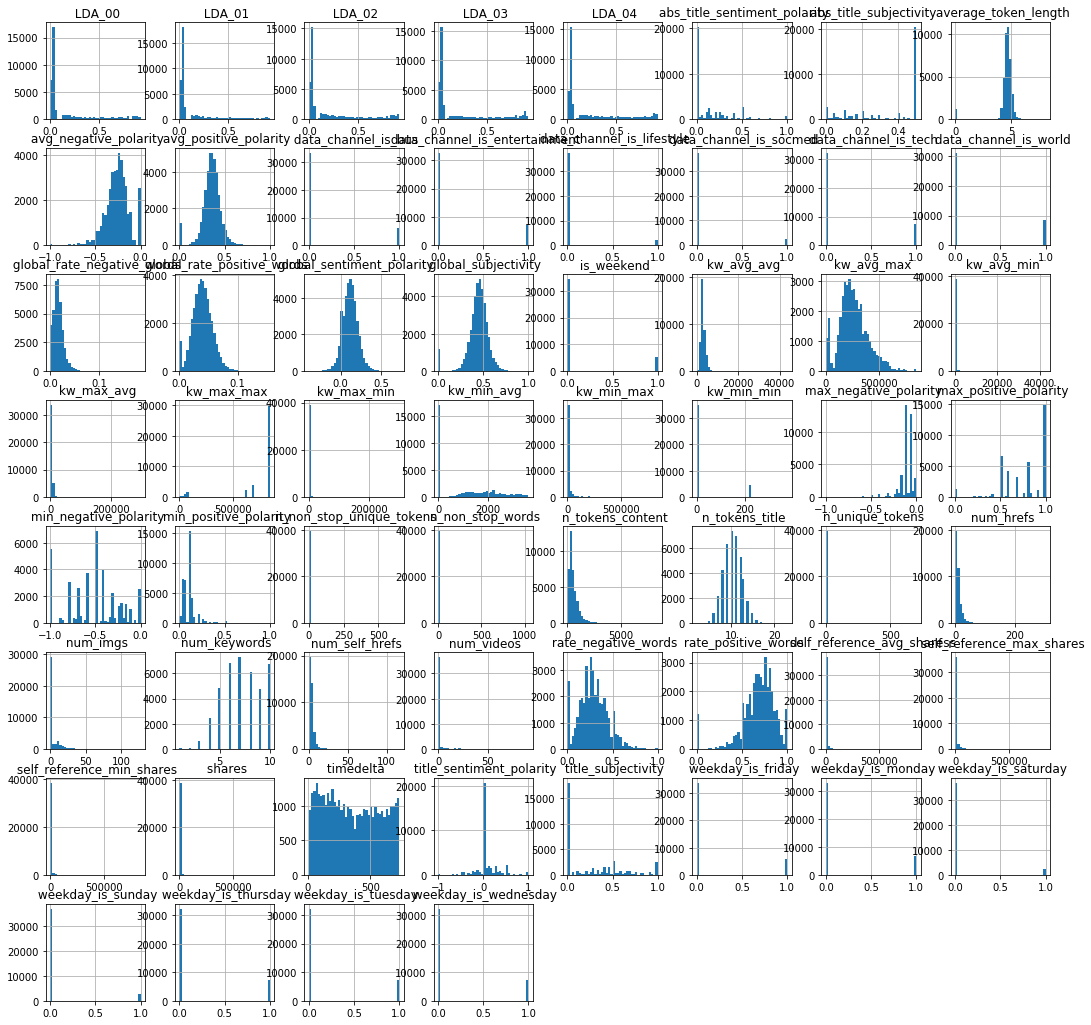

In [45]:
# Finding distribution of data - Plotting Histograms

import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
% matplotlib inline

news.hist(bins = 40, figsize = (18,18))
plt.show()

In [46]:
unique_counts = news.nunique()
unique_counts[unique_counts<30]

 n_tokens_title                   20
 num_keywords                     10
 data_channel_is_lifestyle         2
 data_channel_is_entertainment     2
 data_channel_is_bus               2
 data_channel_is_socmed            2
 data_channel_is_tech              2
 data_channel_is_world             2
 kw_min_min                       26
 weekday_is_monday                 2
 weekday_is_tuesday                2
 weekday_is_wednesday              2
 weekday_is_thursday               2
 weekday_is_friday                 2
 weekday_is_saturday               2
 weekday_is_sunday                 2
 is_weekend                        2
dtype: int64

### Analyzing outliers in  target column- shares

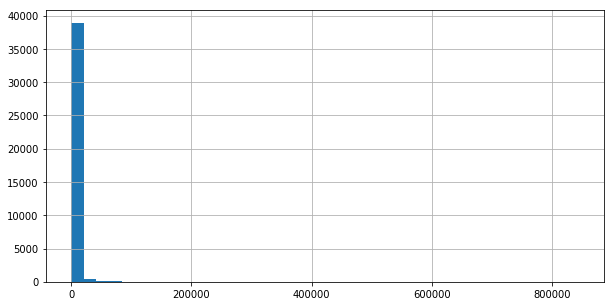

In [47]:
news[' shares'].hist(bins = 40, figsize = (10,5))
plt.show()

In [48]:
news[' shares'].max()

843300

The distribuion of shares values is skewed to the left. The maximum value is not even visible on the distribtion. We can identify and remove the outliers from the data. 

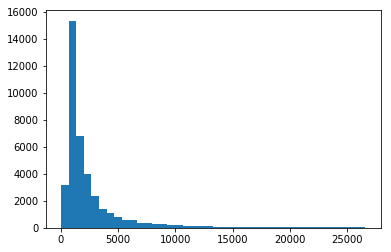

In [49]:
def remove_outliers(data,column):
    mean_val = np.mean(data[column])
    sd_val = np.std(data[column])
    filtered_data = [e for e in (data[column]) if mean_val-2*sd_val < e < mean_val + 2*sd_val]
    return filtered_data

clean_data = remove_outliers(news,' shares')
plt.hist(clean_data,bins = 40)
plt.show()

The data points which are two standard deviations away from the mean will be removed from the data. 
For the number of shares, this value is 3395 +2(11626) = 26647. 

We will remove all the rows where the number of shares is greater than 26647.

In [50]:
clean_news = news[news[' shares']<26647]
clean_news.shape

(39130, 61)

### Finding correlations

In [51]:
corr_data = clean_news.corr()
corr_data = corr_data[' shares'].sort_values(ascending = False)
corr_data

 shares                           1.000000
 kw_avg_avg                       0.184027
 LDA_03                           0.122997
 kw_max_avg                       0.096294
 kw_min_avg                       0.081258
 num_hrefs                        0.076651
 num_imgs                         0.073403
 self_reference_avg_sharess       0.067889
 is_weekend                       0.067792
 self_reference_min_shares        0.060230
 self_reference_max_shares        0.055830
 kw_avg_max                       0.052563
 global_subjectivity              0.052508
 abs_title_sentiment_polarity     0.052128
 weekday_is_sunday                0.049506
 title_subjectivity               0.048917
 data_channel_is_socmed           0.047302
 num_keywords                     0.044302
 weekday_is_saturday              0.042820
 title_sentiment_polarity         0.037470
 num_videos                       0.036995
 kw_avg_min                       0.036717
 kw_max_min                       0.033022
 data_chann

Overall, the correlation of the independent columns is relatively lower than our target dependent column- shares. We will consider the top 15 correlated variables to continue our analysis. 

In [52]:
columns = list(corr_data[:16].index)
columns.remove(' shares')
columns

[' kw_avg_avg',
 ' LDA_03',
 ' kw_max_avg',
 ' kw_min_avg',
 ' num_hrefs',
 ' num_imgs',
 ' self_reference_avg_sharess',
 ' is_weekend',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' kw_avg_max',
 ' global_subjectivity',
 ' abs_title_sentiment_polarity',
 ' weekday_is_sunday',
 ' title_subjectivity']

kw_avg_avg has the highest correlation with shares with a valuw of 0.18 (not very strong). None of the variables are outweighing the other variables in terms of correlation with the target column. 

If any particular variable or a group of variables were outweighing other variables in terms of correlation with the target column, we would have applied stratified sampling.


### Splitting the data into Train and Test

In [53]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(clean_news, test_size = 0.20,random_state = 42) # using random state to generate same results for every run

In [54]:
# Dropping url and shares column from train and test datasets
train_X = train_set.drop(['url',' shares'], axis = 1)
train_Y = train_set[' shares']

test_X = test_set.drop(['url',' shares'], axis =1)
test_Y = test_set[' shares']

### Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
# Predicting values for first 500 rows of the train data set.
sample_train_X = train_X.iloc[:500]
sample_train_Y = train_Y.iloc[:500] # target values from the train data set

sample_df = pd.DataFrame()
sample_df['Actual_Shares'] = sample_train_Y
sample_df['Predicted_Shares'] = lr.predict(sample_train_X)

sample_df.head()

,Actual_Shares,Predicted_Shares
11868,1600,2242.968591
26255,1100,1815.356175
11357,904,2756.112134
37962,2500,1944.872642
27596,981,1767.350468


The predictions deviate from the actual shares values. We can plot the regression line to see the fit.  

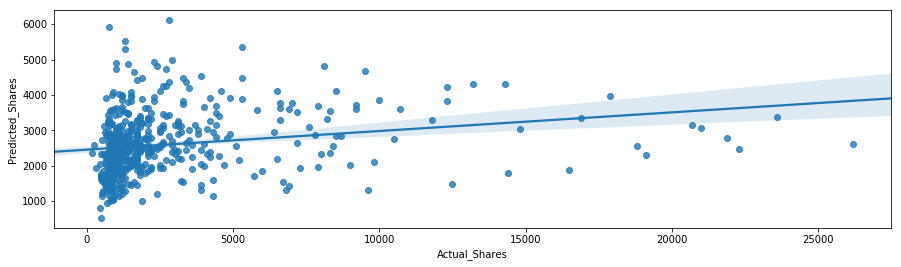

In [57]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.regplot(sample_df['Actual_Shares'],sample_df['Predicted_Shares'])
plt.show()

### Calculating error metric for Linear Regression

In [58]:
from sklearn.metrics import mean_squared_error
lr.fit(train_X,train_Y)
predictions = lr.predict(train_X)
mse = mean_squared_error(train_Y, predictions) # Calculating mean squared error
rmse = np.sqrt(mse) # Calculating the root of mean squared error
rmse

3272.521188636567

The error metric value (rmse) is way too high. This means that the model is underfitting the training data. This can happen because we might not be using the good set of features to make our predictions and/or the model is not powerful enough or is not the right model to use on our data. 

We can try using better set of features or use a different model to make predictions. 

Let us try using the features which had the most corrleation with the target column-shares.

In [59]:
columns

[' kw_avg_avg',
 ' LDA_03',
 ' kw_max_avg',
 ' kw_min_avg',
 ' num_hrefs',
 ' num_imgs',
 ' self_reference_avg_sharess',
 ' is_weekend',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' kw_avg_max',
 ' global_subjectivity',
 ' abs_title_sentiment_polarity',
 ' weekday_is_sunday',
 ' title_subjectivity']

In [60]:
lr.fit(train_X[columns],train_Y)
predictions = lr.predict(train_X[columns])
mse = mean_squared_error(train_Y, predictions) # Calculating mean squared error
rmse = np.sqrt(mse) # Calculating the root of mean squared error
rmse

3296.907526997184

The error metric value has increased even further by using the features which had the most corrleation with the target column. We can try using a different model to make predictions and analyze the error metric to validate the outcome. 

### Decision Trees

In [61]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)

dt.fit(train_X,train_Y)

# Predicting values for first 500 rows of the train data set.
sample_train_X = train_X.iloc[:500]
sample_train_Y = train_Y.iloc[:500] # target values from the train data set

tree_sample_df = pd.DataFrame()
tree_sample_df['Actual_Shares'] = sample_train_Y
tree_sample_df['Predicted_Shares'] = dt.predict(sample_train_X)

tree_sample_df.head()


,Actual_Shares,Predicted_Shares
11868,1600,1600.0
26255,1100,1100.0
11357,904,904.0
37962,2500,2500.0
27596,981,981.0


The predictions for the first few rows match exactly with the actual values. Lets check the error metric for the predicted shares.

In [62]:
# Calculating the Error Metric for decision trees

dt_mse = mean_squared_error(tree_sample_df['Actual_Shares'],tree_sample_df['Predicted_Shares'] )
dt_rmse = np.sqrt(dt_mse)

print(dt_mse)
print(dt_rmse)

0.0
0.0


Mean Squared error values are 0. This shows that the model is clearly overfitting the training data. 
- This means that the model will perform very well with the training set but not with the undeen data or the testing set. 

We can apply cross validation to see how the model behaves and calculate the error metric. 

### Cross Validaiton - Decision Tree 

In [63]:
# Performing K-Fold Cross Validation in Decision Tree model

from sklearn.model_selection import cross_val_score

dt_cross_mse = cross_val_score(dt,train_X, train_Y, scoring="neg_mean_squared_error", cv = 7)

dt_cross_rmse = np.sqrt(-dt_cross_mse)
print(dt_cross_rmse)

# Calculating mean of RMSE values
dt_cross_mean = np.mean(dt_cross_rmse)
print('Mean RMSE for Decision Trees: ', dt_cross_mean)

[4849.74168122 4798.29679094 4840.17608209 4725.86741827 4880.03015111
 4779.29781273 4828.44546639]
Mean RMSE for Decision Trees:  4814.550771819381


The RMSE of the decision trees after applying the cross validation does not impress. The RMSE is even higher than the RMSE of linear regression model. 

Let us apply cross validaiton to our linear regression model.

### Cross Validaiton - Linear Regression

In [64]:
# Performing K-Fold Cross Validation in Linear Regression model

lr_cross_mse = cross_val_score(lr, train_X, train_Y, scoring  = "neg_mean_squared_error", cv = 7)

lr_cross_rmse = np.sqrt(-lr_cross_mse)
print(lr_cross_rmse)

# Calculating mean of RMSE values
lr_cross_mean = np.mean(lr_cross_rmse)
print('Mean RMSE for Linear Regression Trees: ', lr_cross_mean)

[ 3335.12687787  3293.20870608  3363.55502314  3245.66642842
 21977.29134461  3236.34929298  3074.47912393]
Mean RMSE for Linear Regression Trees:  5932.239542432481


The RMSE values for Linear Regression and Decision Trees is very high. We need to try out other models to fit our data and make predictions. 

Lets try the ensemble model of Decision Trees - RandomFrorests

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)
rf.fit(train_X,train_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [66]:
sample_X = train_X.iloc[:500]
sample_Y = train_Y.iloc[:500]

forests_sample_df = pd.DataFrame()
forests_sample_df['Actual_Shares'] = sample_Y
forests_sample_df['Predicted_Shares'] = rf.predict(sample_X)


forests_sample_df.head()

,Actual_Shares,Predicted_Shares
11868,1600,1383.5
26255,1100,1750.0
11357,904,822.8
37962,2500,2370.0
27596,981,1138.6


The predicted values from the RandomForests algorithm are better than our previous models. Lets calculate the error metric for our RandomForests model.


In [67]:
rf_predictions = rf.predict(train_X)
rf_mse = mean_squared_error(train_Y,rf_predictions)

rf_rmse = np.sqrt(rf_mse)
rf_rmse

1495.2627219739318

Again, as seen in the predicted values, the RMSE value for RandomForests algorithm is better than the RMSE of our previous Linear Regression and Decision Trees models.

Lets apply cross validaiton to our RandomForests model.

### Cross Validaiton - RandomForests

In [68]:
rf_cross_scores = cross_val_score(rf,train_X, train_Y, scoring  = "neg_mean_squared_error", cv = 7)
rf_cross_rmse = np.sqrt(-rf_cross_scores)
print(rf_cross_rmse)

mean_rf_scores = np.mean(rf_cross_rmse)
print('Mean RMSE for RandomForests: ',mean_rf_scores)


[3548.90607306 3503.46136417 3632.7913437  3443.85887216 3645.47588505
 3499.31960768 3349.9033745 ]
Mean RMSE for RandomForests:  3517.673788616022


Looks like the RandomForests algorithm is not giving good predicitons after cross validaiton. 

Leaving out the cross validaiotn, RandomForests gives us the best predictions when compared to the other algorithms. 
Our application of RandomForests can be enhanced further by hyperpameter optimization. 

### Random Search Cross Validation in Scikit-Learn 

There can be several parmaters which can be used to enhance our implementation of RandomForests algorithms. Following are a few parameters-

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

There can be several combinations of individual parameters which can be used. So, the hyperparameter search space can become considerably large. 

Using RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.


In [69]:
# Creating parameters for Random search

# Number of trees in random forest
n_estimators = [np.random.randint(low=1, high=25)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [70]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(rf, param_distributions=random_grid,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)


rf_random.fit(train_X, train_Y)


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [7], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [71]:
results = rf_random.cv_results_
for mean_score,params in zip(results['mean_test_score'], results['params']):
    print(np.sqrt(-mean_score), params)

3353.7581596372133 {'n_estimators': 7, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False}
3440.9289232840806 {'n_estimators': 7, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}
4100.920529417612 {'n_estimators': 7, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'bootstrap': False}
3445.365319352899 {'n_estimators': 7, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}
3373.295949850243 {'n_estimators': 7, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}
3417.957893614475 {'n_estimators': 7, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}
4398.545798345765 {'n_estimators': 7, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': False}
3455.663895640574 {'n_estimators': 7, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_featu

In [72]:
rf_random.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 7}

Using best\_params\_, we can extratct the best parameters which produced the best error metric value for the RandomForests. 

We can use a Grid search with Cross Validation for Random Forests. 

### Grid Search Cross Validation in Scikit-Learn

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search.

In [73]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10],
    'n_estimators': [np.random.randint(low=1, high=25)]}

rf_grid = GridSearchCV(rf, param_grid=param_grid, 
                       cv = 3, n_jobs = -1, scoring='neg_mean_squared_error',verbose = 2)

rf_grid.fit(train_X, train_Y)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5 
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5 
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5 
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=5 
[CV]  bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5, total=   1.4s
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=5 
[CV]  bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=5, total=   1.3s
[CV] bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=5 
[CV]  bootstrap=False, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5, total=   1.5s
[CV] bootstra

[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    9.6s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [False], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [74]:
rf_grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 5}

In [75]:
results = rf_grid.cv_results_
for mean_score,params in zip(results['mean_test_score'], results['params']):
    print(np.sqrt(-mean_score), params)

3592.6329328974357 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
3555.56962725734 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}
3496.567714447356 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 5}
3509.529707371328 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}
3506.3051675401293 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 5}
3438.1519221231174 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 5}
3409.2302210360235 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 5}
3409.2302210360235 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_

We can evaluate the model with the Test data.

### Evaluating Test Data Set

In [76]:
test_model = rf_grid.best_estimator_

test_predictions = test_model.predict(test_X)

test_predictions_mse = mean_squared_error(test_Y,test_predictions)
test_predictions_rmse = np.sqrt(test_predictions_mse)
test_predictions_rmse

3189.397743453224

In [82]:
X_data = test_X.iloc[:] #seems to be working also w-o .iloc!
y_data = test_Y.iloc[:]

predictions =  list(test_model.predict(test_X))
actual_shares = list(y_data)

final_predictions = [predictions,y_data]
final_predictions = sorted(zip(predictions, y_data), reverse=True)

In [83]:
final_shares = pd.DataFrame(predictions,actual_shares)
final_shares.reset_index(level=0, inplace=True)
final_shares = final_shares.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
final_shares.head()

,Actual shares,Predicted shares
0,2600,2590.452381
1,870,1557.640476
2,1200,1531.164286
3,655,3875.571429
4,4600,2955.833333


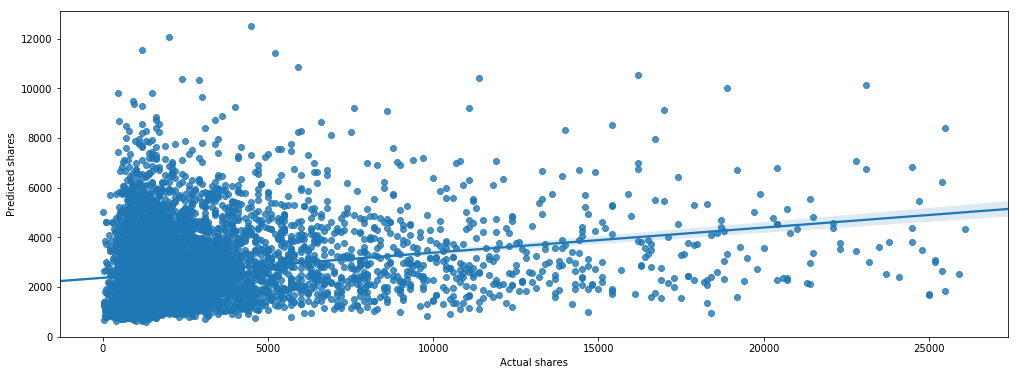

In [84]:
# Plotting the Actual and Predicted shares

f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=final_shares["Actual shares"], y=final_shares["Predicted shares"])
#sns.plt.show()

Lot of dispersion in the plot. Plotting a histogram for different view. 

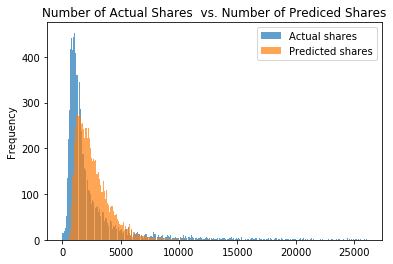

In [85]:

final_shares.plot(bins=300, kind='hist', alpha=0.7)
plt.title('Number of Actual Shares  vs. Number of Prediced Shares')
plt.show()

Model seems to be predicting higer shares than the actual values. Lets calculate the R2 score.

In [86]:
from sklearn.metrics import r2_score

r2_score(actual_shares, predictions)

0.004016484763607164

Low r2 value shows that the prediction power of the model is not accurate. 

### Conlcusion
Working further with the Random Forest, the model can be improved by including more meaninglful features and getting rid of features which do not add value to the model. 